# MIST (Modified National Institute of Standards and Technology)
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Because the images in MNIST are made up of bytes at th begining of each file the first four bytes represent a number reffered to as a magic number in this case the magic number is 2051 for the images file while the magic number for the labels file is 2049. 

The purpose of this is to ensure that the data is being read correctly and to determine which file is being read. By looking at the table found at: http://yann.lecun.com/exdb/mnist/ by looking at the four files we can see the set of expected magic number, number of images and number of row and columns are contained withing the first 16 Bytes in the images files while the labels only require the first 8 bytes.

# Unzipping and reading the images

In [1]:
# Adapted from https://docs.python.org/3/library/gzip.html

# For unzipping the file within the script.
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content_images = f.read()

The MNIST dataset is derived form the NIST dataset. It contain four zipped files which contain bytes that we can read using the gzip module to unzip them in the script itself.

In [2]:
# check the file type
type(file_content_images)

bytes

In [3]:
# Outputs hexideicmal characters printing each byte of the file
file_content_images[0:4]

b'\x00\x00\x08\x03'

# Unzipping and reading the labels

In [4]:
# Adapted from: https://docs.python.org/2/library/gzip.html
# For unzipping the file within the script.
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    file_content_labels = f.read()

In [5]:
# check the file type
type(file_content_labels)

bytes

In [6]:
# Taken in big endian and we get the magic number 2051
int.from_bytes( file_content_images[0:4], byteorder='big')   

2051

In [7]:
# Number of images in the file
int.from_bytes( file_content_images[4:8], byteorder='big')

10000

In [8]:
# Number of rows
int.from_bytes(file_content_images[8:12], byteorder='big')

28

In [9]:
# Number of columns
int.from_bytes(file_content_images[12:16], byteorder='big')

28

In [10]:
# Taken in big endian and we get the magic number 2049
int.from_bytes( file_content_labels[0:4], byteorder='big')   

2049

In [11]:
# Number of images in the file
int.from_bytes( file_content_labels[4:8], byteorder='big')

10000

In [12]:
import numpy as np
image = ~np.array(list(file_content_images[16:800])).reshape(28,28).astype(np.uint8)

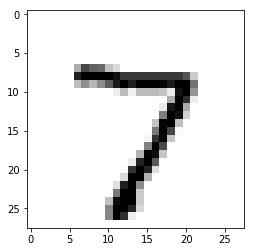

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

In [14]:
int.from_bytes(file_content_labels[8:9], byteorder="big")

7

We can see by comparing the images of the 7 and 2 that the ~ character converts the image simliar to how dilation works while cmap applys greyscale.

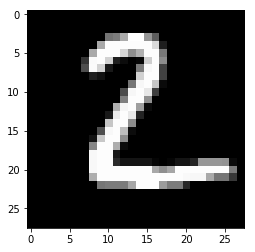

In [15]:
image = np.array(list(file_content_images[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

In [16]:
int.from_bytes(file_content_labels[9:10], byteorder="big")

2

# Unzipping and reading the training data and labels

In [17]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_content_images = f.read()
    
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_content_labels = f.read()

In [18]:
int.from_bytes(train_content_images[4:8], byteorder='big')

60000

In [19]:
# check the file type
type(file_content_images)

bytes

In [20]:
int.from_bytes(train_content_labels[4:8], byteorder='big')

60000

In [21]:
# check the file type
type(train_content_labels)

bytes

# Converting the bytes to a 2D array to store them
As we can tell from the MNIST documentation and the bytes in the images files the bytes are in a 28x28 grid in pixels that are in a greyscale in a range from 0 to 1 with 0 being black pixels and 1 being white this means that we can convert them into a 2D array for storage and use a loop to get every 784 (28x28 = 784) bytes after the first 16.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

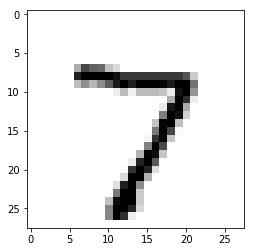

In [23]:
# use np.frombuffer to get the offset of the first 16 or 8 bytes.

image_array = np.frombuffer(file_content_images, dtype = np.uint8, offset = 16)

image_array = image_array.reshape(10000, 28, 28)

plt.imshow(~image_array[0], cmap="gray")

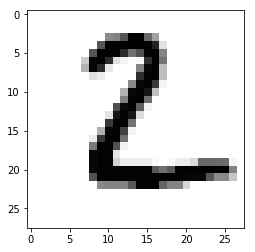

In [24]:
plt.imshow(~image_array[1], cmap="gray")

In [26]:
# use np.frombuffer to get the offset of the first 16 or 8 bytes.
label_array = np.frombuffer(file_content_labels, dtype = np.uint8, offset = 8)
print(label_array[0])

7


In [27]:
print(label_array[1])

2


Once we have the file contents put into an arrray we have to get the labels and then assign them to each of the images within the array.

In [38]:
label_array = np.frombuffer(file_content_labels, dtype = np.uint8, offset = 8)

In [39]:
print(label_array[0])

7


We then take the labels from the labels file and concatenate them to the repsevtive names of the image files. We will be doing this by looping through the image files and assigning names as we store them locally. I will only be doing this for 10 images to conserve space but we can put the range up to the amount of images in the file (10,000).

TypeError: Invalid dimensions for image data

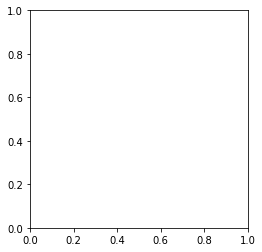

In [43]:
for x in range(5):
    plt.imshow(~label_array[x], cmap="gray")
    plt.savefig('data/t10k-id' + str(x+1) + '-' + str(label_array[x]) + '-ubyte')